# Project Ensemble Techniques
## By Ajay Kumar

###• DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting 
informative signals. Company wants to build a machine learning model which can help the company to predict the 
equipment’s signal quality using various parameters. 

• DATA DESCRIPTION: The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.

2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or 
quality [as number].

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import h5py
import tensorflow
import random
random.seed(0)
warnings.filterwarnings('ignore')
%matplotlib inline
tensorflow.__version__

'2.5.0'

# PART ONE

## Q1. Import data.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/DEEP LEARNING/Signal.csv')
print(df.shape)
df.head()

(1599, 12)


Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

The Dataset has 1599 entries and 12 features.

## Q2. Data analysis & visualisation

• Perform relevant and detailed statistical analysis on the data.

• Perform relevant and detailed uni, bi and multi variate analysis. 

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better 
analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 

###• Perform relevant and detailed statistical analysis on the data.

In [4]:
# Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The Dataset has no null values and 11 features are float and 1 is integer data types.

In [5]:
# Descriptive statistics
df.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

**Analysing the 11 parameters : Parameter 1 ranges between 4.6 and 15.9**

**Maximum value of Parameter 5 is 0.**

**Parameter 5 has a very low range between 0.047 and 0.611 and also very low standard deviation**

**Standard deviation is highest for Parameter 7, it is 32.895324**

**'Signal_Strength' has classes as - Min 3 and Max 8**

In [6]:
# Null value check
df.isnull().sum().any()

False

The Dataset has no null values

In [7]:
# Diplicate value check
df.duplicated().sum()

240

In [8]:
df[df.duplicated()]

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
4             7.4        0.700  ...           9.4                5
11            7.5        0.500  ...          10.5                5
27            7.9        0.430  ...           9.5                5
40            7.3        0.450  ...          10.5                5
65            7.2        0.725  ...          10.9                5
...           ...          ...  ...           ...              ...
1563          7.2        0.695  ...          10.1                5
1564          7.2        0.695  ...          10.1                5
1567          7.2        0.695  ...          10.1                5
1581          6.2        0.560  ...          11.3                5
1596          6.3        0.510  ...          11.0                6

[240 rows x 12 columns]

The Dataset has 240 duplicate values but they are not real duplicate values so not droping the values.

In [9]:
# Checking the class of the target
df['Signal_Strength'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Signal_Strength, dtype: int64

The are total 6 class of the target variable i.e signal strength.

###• Perform relevant and detailed uni, bi and multi variate analysis.

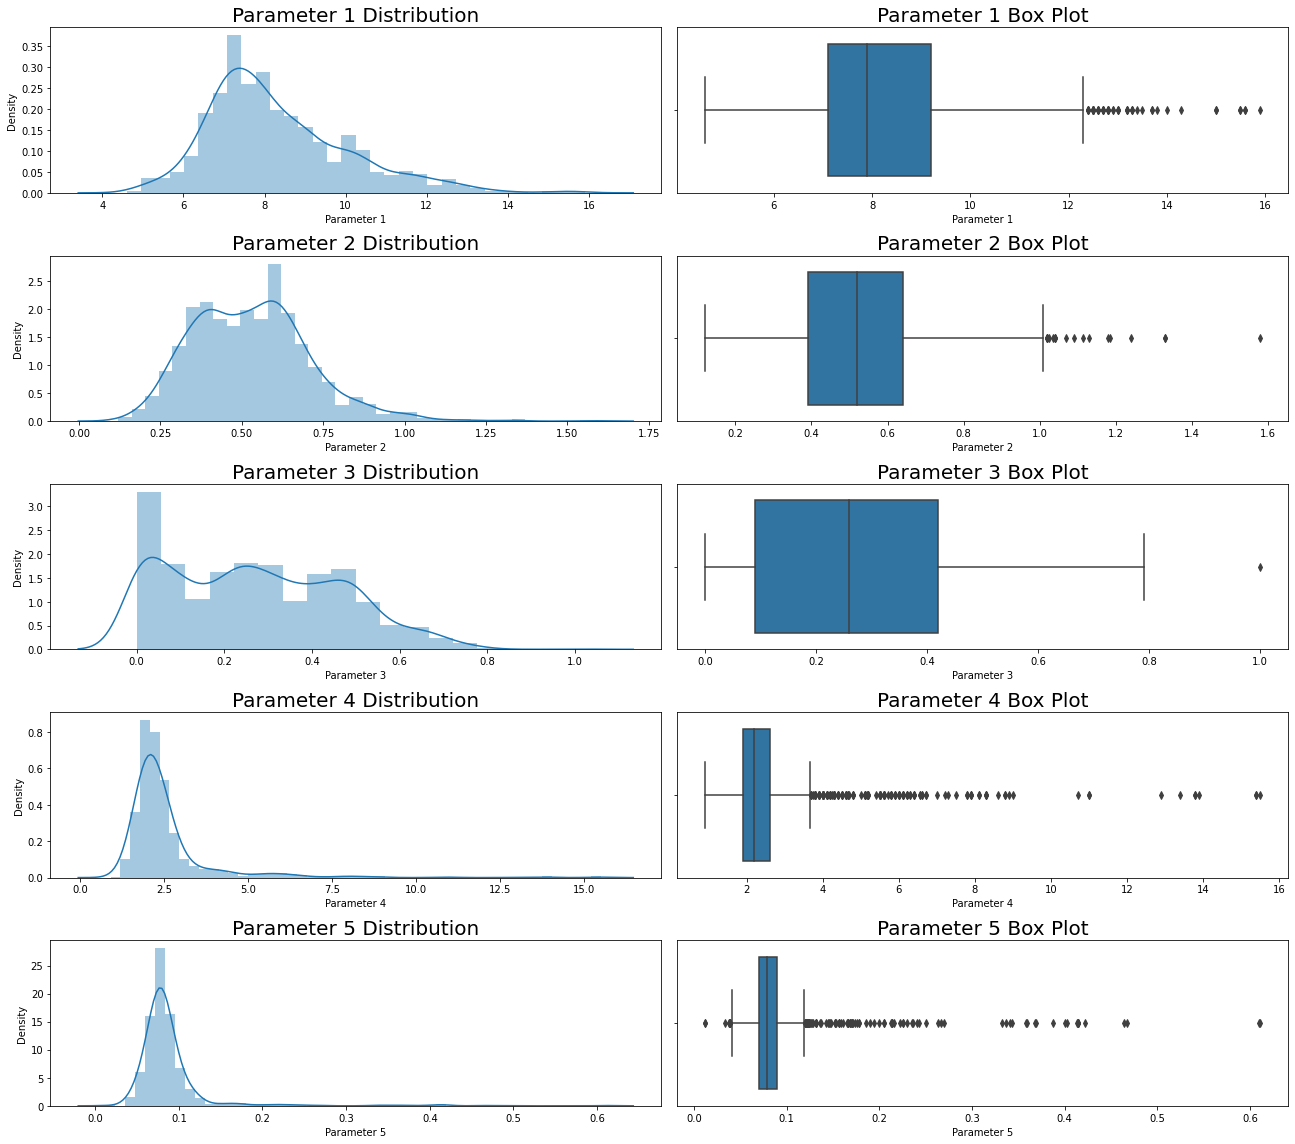

In [10]:
# Univariate Analysis
fig, axes = plt.subplots(5,2)
fig.set_size_inches(18,16)
a = sns.distplot(df['Parameter 1'], ax=axes[0][0])
a.set_title('Parameter 1 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 1'],  ax = axes[0][1])
a.set_title('Parameter 1 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 2'], ax=axes[1][0])
a.set_title('Parameter 2 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 2'],  ax = axes[1][1])
a.set_title('Parameter 2 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 3'], ax=axes[2][0])
a.set_title('Parameter 3 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 3'],  ax = axes[2][1])
a.set_title('Parameter 3 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 4'], ax=axes[3][0])
a.set_title('Parameter 4 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 4'],  ax = axes[3][1])
a.set_title('Parameter 4 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 5'], ax=axes[4][0])
a.set_title('Parameter 5 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 5'],  ax = axes[4][1])
a.set_title('Parameter 5 Box Plot', fontsize=20)

plt.tight_layout()
plt.show()

'Parameter 1': Slightly right skewed and some upper outliers

'Parameter 2': Almost normally distributed and some upper outliers

'Parameter 3': Right skewed and one upper outliers

'Parameter 4': Slightly right skewed and some upper outliers

'Parameter 5': Right skewed and some upper outliers

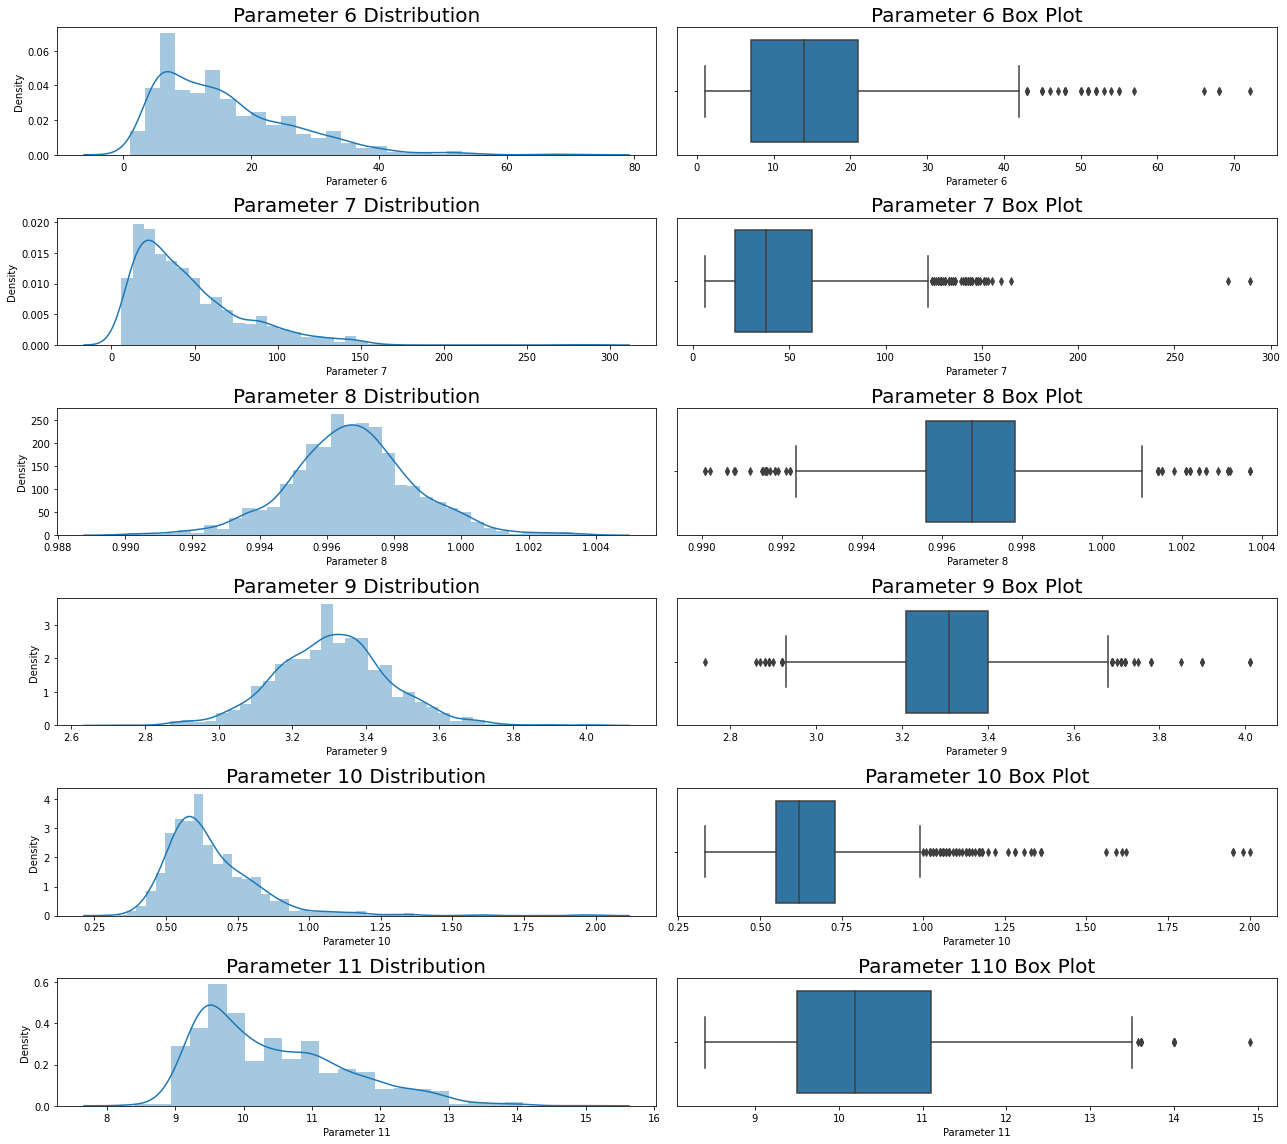

In [11]:
# Univariate Analysis
fig, axes = plt.subplots(6,2)
fig.set_size_inches(18,16)
a = sns.distplot(df['Parameter 6'], ax=axes[0][0])
a.set_title('Parameter 6 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 6'],  ax = axes[0][1])
a.set_title('Parameter 6 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 7'], ax=axes[1][0])
a.set_title('Parameter 7 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 7'],  ax = axes[1][1])
a.set_title('Parameter 7 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 8'], ax=axes[2][0])
a.set_title('Parameter 8 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 8'],  ax = axes[2][1])
a.set_title('Parameter 8 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 9'], ax=axes[3][0])
a.set_title('Parameter 9 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 9'],  ax = axes[3][1])
a.set_title('Parameter 9 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 10'], ax=axes[4][0])
a.set_title('Parameter 10 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 10'],  ax = axes[4][1])
a.set_title('Parameter 10 Box Plot', fontsize=20)

a = sns.distplot(df['Parameter 11'], ax=axes[5][0])
a.set_title('Parameter 11 Distribution', fontsize=20)
a = sns.boxplot(df['Parameter 11'],  ax = axes[5][1])
a.set_title('Parameter 110 Box Plot', fontsize=20)

plt.tight_layout()
plt.show()

'Parameter 6' : Right skewed and some upper outliers

'Parameter 7' : Right skewed and some upper outliers

'Parameter 8' : Normally distributed and some upper and lower outliers

'Parameter 9' : Normally distributed and some upper and lower outliers

'Parameter 10': Right skewed and some upper outliers

'Parameter 11': Right skewed and some upper outliers

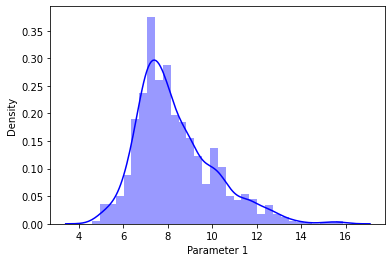

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


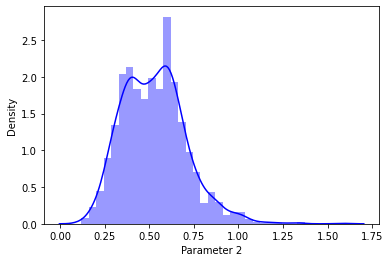

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


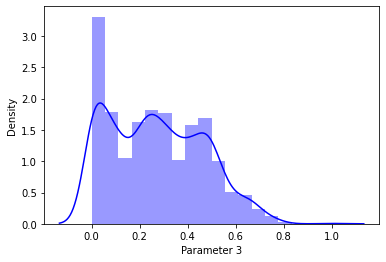

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


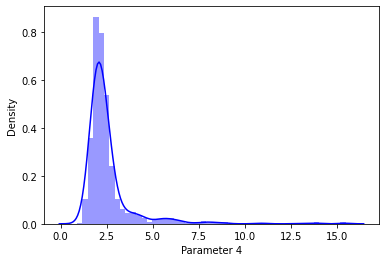

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


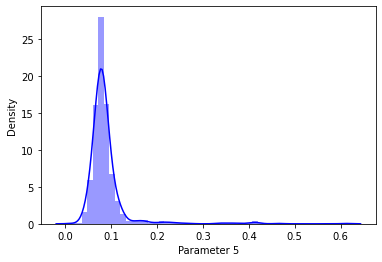

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971722
Maximum is: 0.611
Minimum is: 0.012


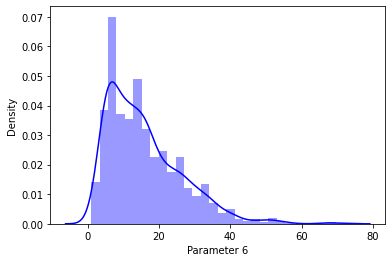

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


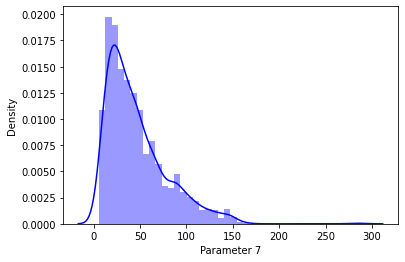

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


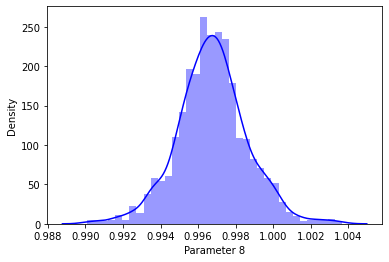

Distribution of  Parameter 8
Mean is: 0.9967466791744833
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425563
Skewness is: 0.07128766294945525
Maximum is: 1.00369
Minimum is: 0.9900700000000001


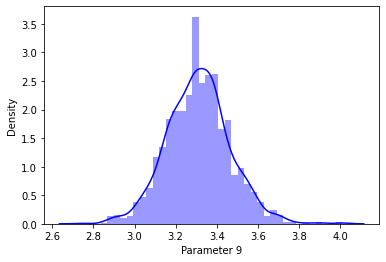

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


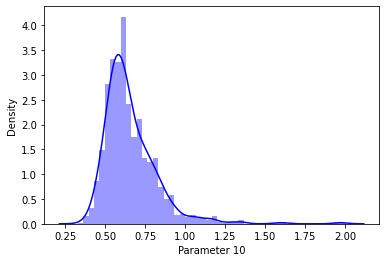

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


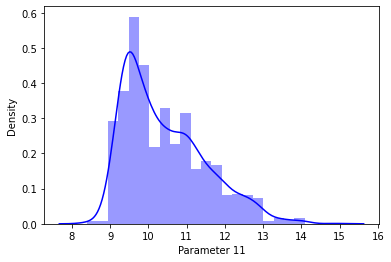

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


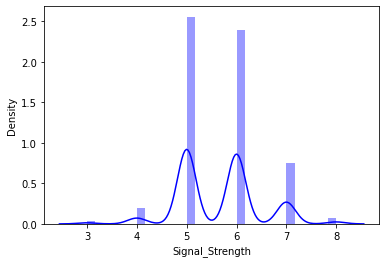

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [12]:
# studying the distribution of continuous attributes with mean, median,mode, max & min and std
cols = list(df)
for i in np.arange(len(cols)):
    sns.distplot(df[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',df[cols[i]].mean())
    print('Median is:',df[cols[i]].median())
    print('Mode is:',df[cols[i]].mode())
    print('Standard deviation is:',df[cols[i]].std())
    print('Skewness is:',df[cols[i]].skew())
    print('Maximum is:',df[cols[i]].max())
    print('Minimum is:',df[cols[i]].min())

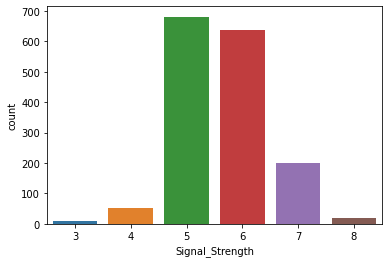

In [13]:
# Checking distibution of the column Signal_Strength
sns.countplot(df['Signal_Strength'])
plt.show()

** Class 5 has the highest no. of count and then class 6**

Text(0.5, 1.0, 'Scatter plot between Parameter 1 and Parameter 3')

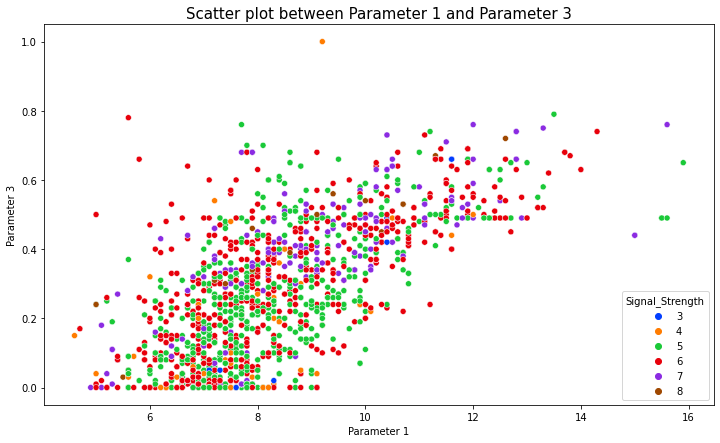

In [14]:
# Bivariate Analysis
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
sns.scatterplot(df['Parameter 1'], df['Parameter 3'], data=df, hue ='Signal_Strength', palette = 'bright', );
plt.title('Scatter plot between Parameter 1 and Parameter 3', fontsize=15)

**Thre is a linear relationship between these two parameter. It indicates the sensor is giving contineous of 5, 6 and 7 at this readings**


Text(0.5, 1.0, 'Scatter plot between Parameter 1 and Parameter 2')

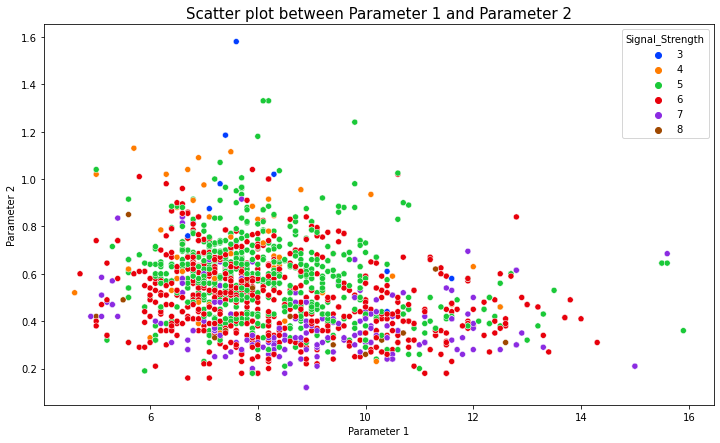

In [15]:
# Bivariate Analysis
sns.scatterplot(df['Parameter 1'], df['Parameter 2'], data=df, hue ='Signal_Strength', palette = 'bright', );
plt.title('Scatter plot between Parameter 1 and Parameter 2', fontsize=15)

**Non linear relationship between these two features. Data piont are spreaded like a cloud**

Text(0.5, 1.0, 'Scatter plot between Parameter 1 and Parameter 8')

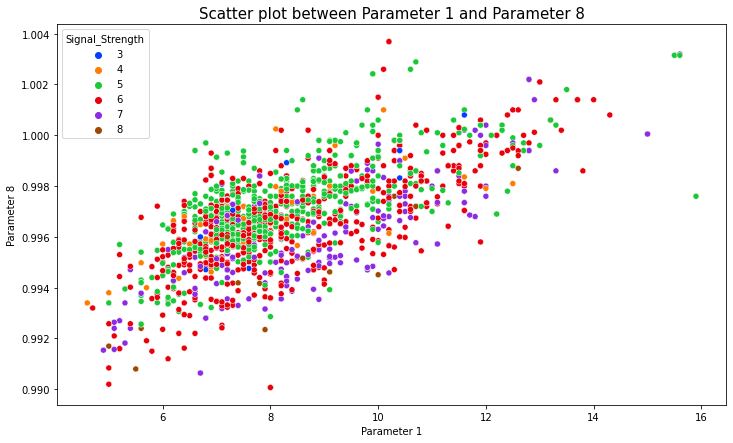

In [16]:
# Bivariate Analysis
sns.scatterplot(df['Parameter 1'], df['Parameter 8'], data=df, hue ='Signal_Strength', palette = 'bright', );
plt.title('Scatter plot between Parameter 1 and Parameter 8', fontsize=15)

**Thre is a strong linear relationship between these two parameter. Indiactes that there is a multicolinearity in the dataset**


Text(0.5, 1.0, 'Scatter plot between Parameter 4 and Singnal Strenght')

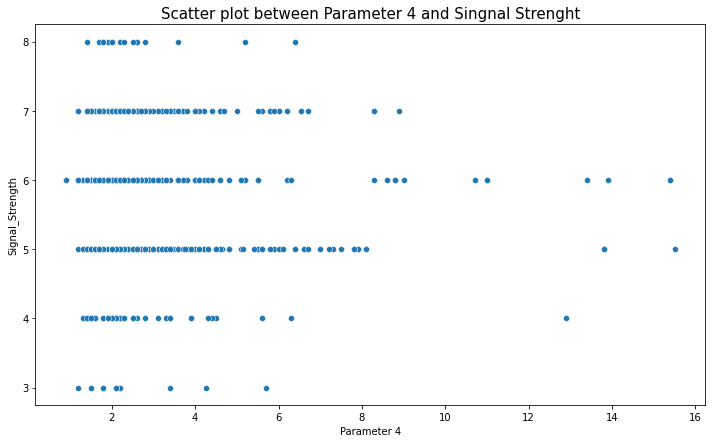

In [17]:
sns.scatterplot(df['Parameter 4'], df['Signal_Strength'], data=df);
plt.title('Scatter plot between Parameter 4 and Singnal Strenght', fontsize=15)

**Signal strenght is good between 2 - 7**

Text(0.5, 1.0, 'Scatter plot between Parameter 10 and Singnal Strenght')

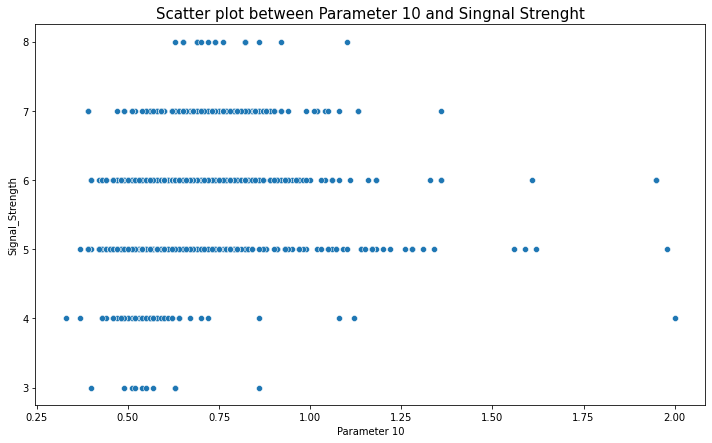

In [18]:
# Bivariate Analysis
sns.scatterplot(df['Parameter 10'], df['Signal_Strength'], data=df);
plt.title('Scatter plot between Parameter 10 and Singnal Strenght', fontsize=15)

**Signal strenght is good between 0.3 - 1.0 reading. This feature is not a good predictor for signal strenght**

Text(0.5, 1.0, 'Scatter plot between Parameter 9 and Singnal Strenght')

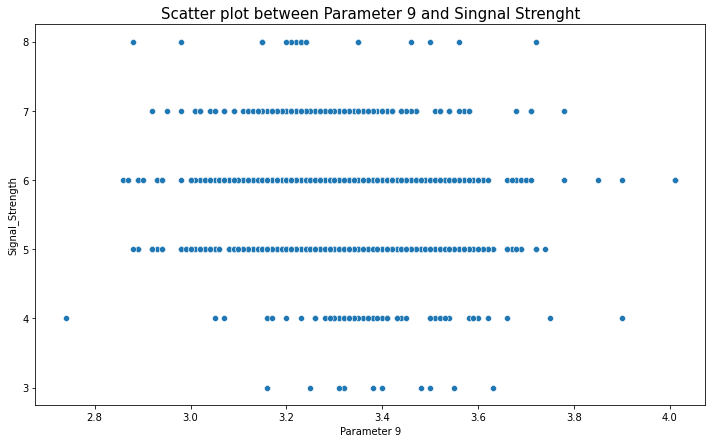

In [19]:
# Bivariate Analysis
sns.scatterplot(df['Parameter 9'], df['Signal_Strength'], data=df);
plt.title('Scatter plot between Parameter 9 and Singnal Strenght', fontsize=15)

**The sensor is giving a continues strenght between the range of 3 - 3.6**

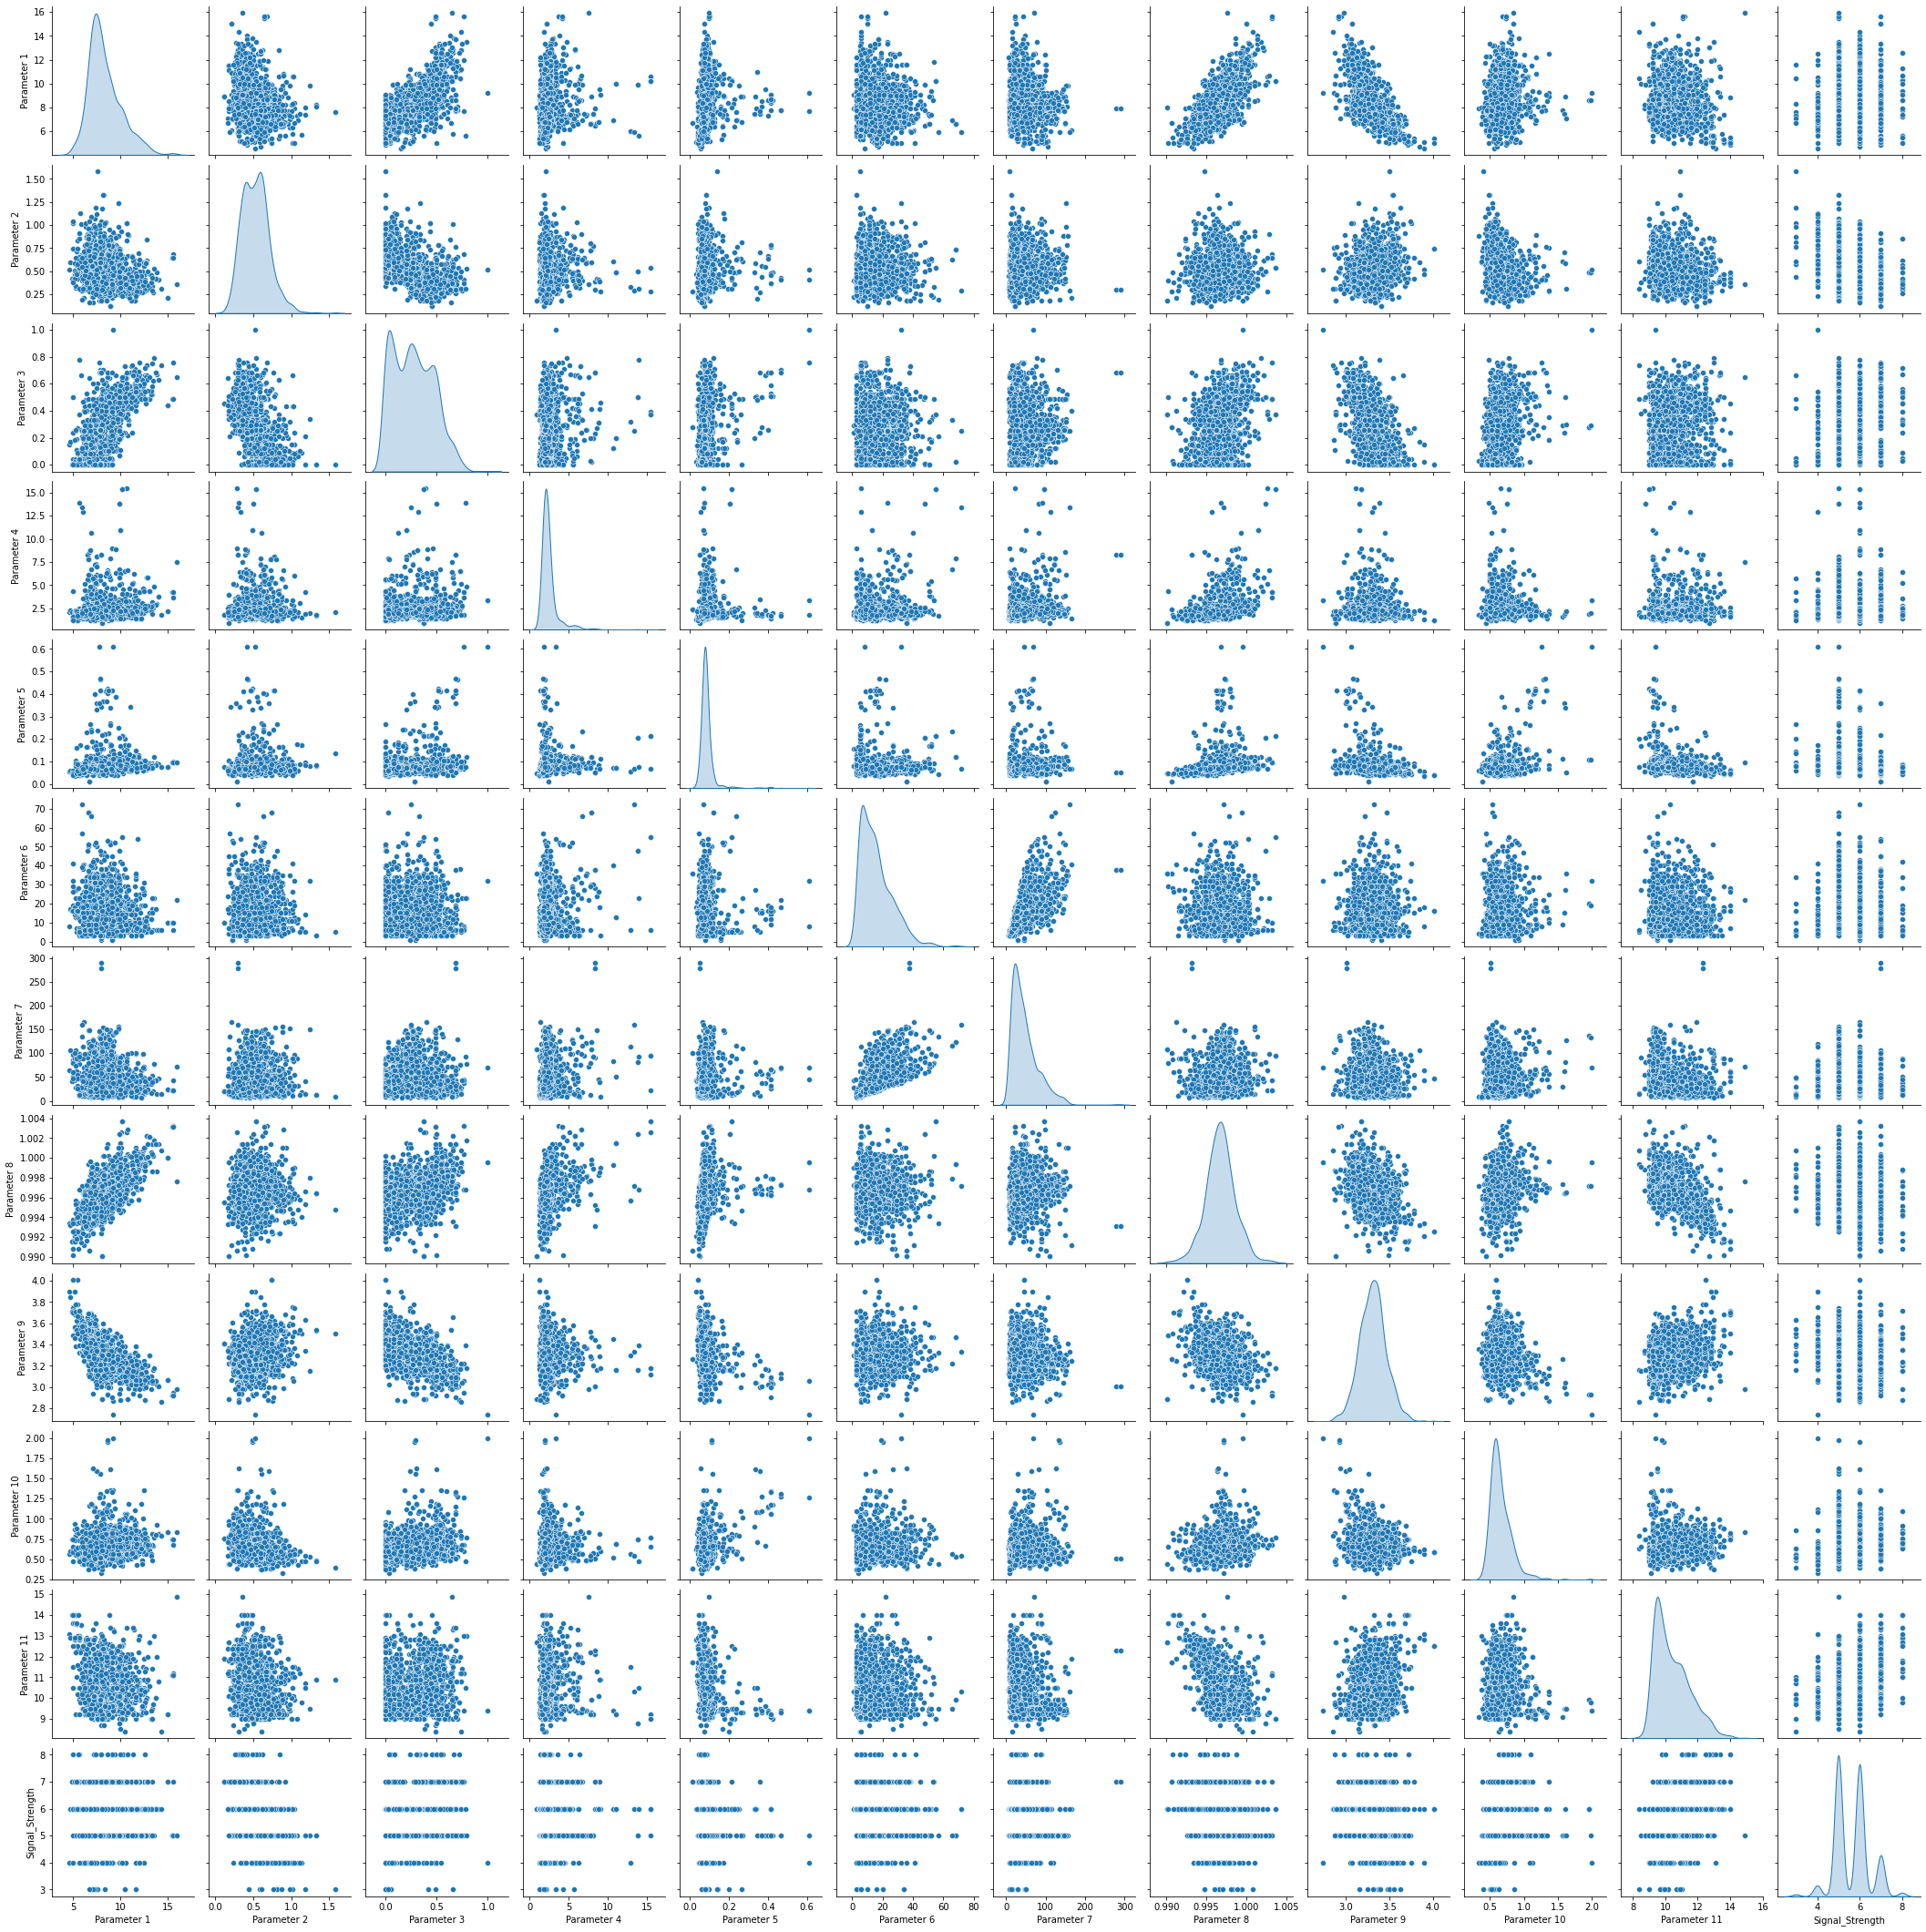

In [20]:
#Multivariate Analysis
sns.pairplot(df, diag_kind='kde');

**Some features are distributed like cloud**

**Parameter 1 is +ve linearly corelated with Parameter 3 and Parameter 8**

**-ve linear coralation between Parameter 1 and 9**

**The digonal image of pairplot indicates that some features are normally distributed and some are right skewed**

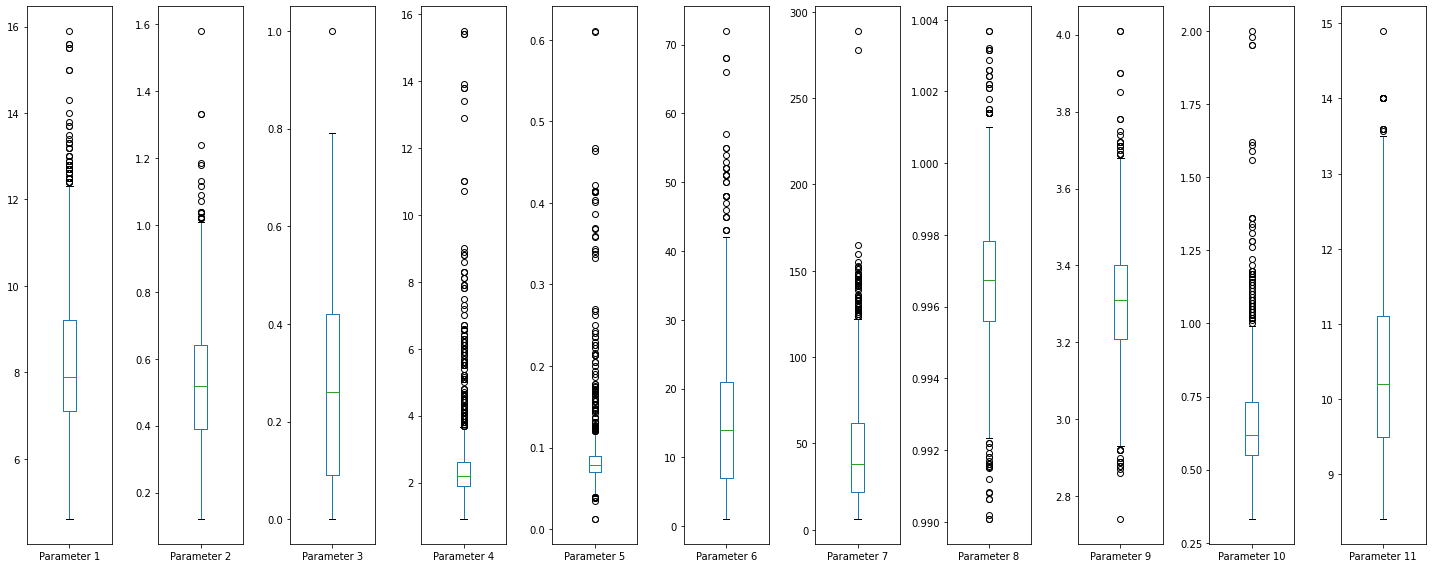

In [21]:
# Outliers Check
df.iloc[:,:11].plot(kind='box', subplots=True, figsize=(20,8));
plt.tight_layout()

**All the features have upper and lower outliers**

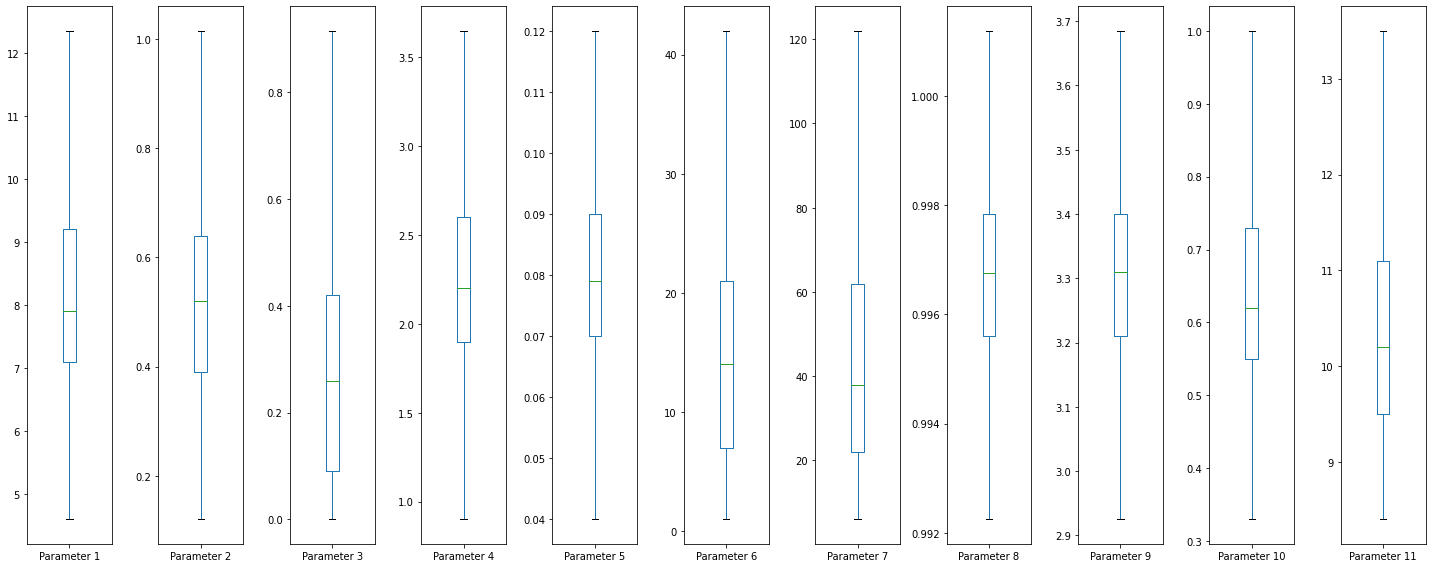

In [22]:
# Treating the outliers using IQR methods
cols = (list(df.iloc[:,:11]))

def out_limit(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range

for col in cols:
  lr, ur = out_limit(df[col])
  df[col] = np.where(df[col] < lr, lr, df[col])
  df[col] = np.where(df[col] > ur, ur, df[col])


# Rechecking Outliers
df.iloc[:,:11].plot(kind='box', subplots=True, figsize=(20,8));
plt.tight_layout()

All the outliers have been removed using IQR methods.

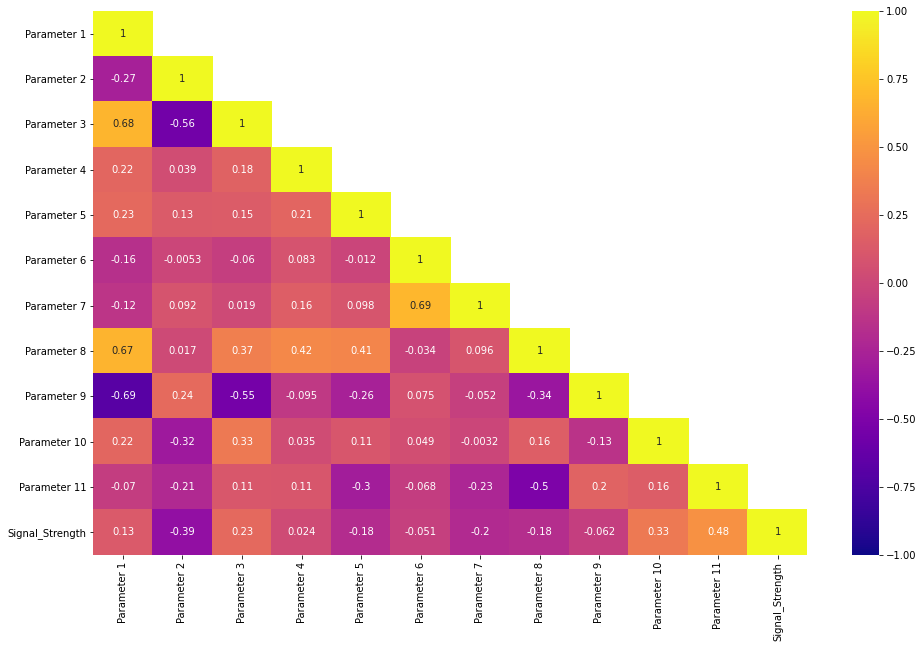

In [23]:
# Coleration Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1,cmap='plasma',mask=np.triu(df.corr(),+1));

**Heatmap says features are highly +ve(Box colored with light yellow and orange color) and -ve(Box colored with light and dark blue color) corelated with eachother**

**Parameter 11 shows some good corelation for predictting the strength**

## Q3. Design, train, tune and test a neural network regressor.

In [24]:
# Seperating the indipendent and target variable
X = df.drop('Signal_Strength', axis=1)
y = df.pop('Signal_Strength')
X.head()

Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
0          7.4         0.70  ...          0.56           9.4
1          7.8         0.88  ...          0.68           9.8
2          7.8         0.76  ...          0.65           9.8
3         11.2         0.28  ...          0.58           9.8
4          7.4         0.70  ...          0.56           9.4

[5 rows x 11 columns]

In [25]:
# Spliting the data into Training and Testing
from sklearn.model_selection import train_test_split
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_vtrain.shape)
print(X_test.shape)
print(y_vtrain.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [26]:
# Now creating the training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=0.20, random_state=1)

In [27]:
# Building Neurral Network
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras import regularizers, optimizers

In [28]:
# Initialize Sequential model
model_reg = tensorflow.keras.models.Sequential()

# Normalizing the input Data
model_reg.add(tensorflow.keras.layers.BatchNormalization(input_shape= (11,)))

# Dense layer for prediction
model_reg.add(tensorflow.keras.layers.Dense(1))

# Compiling the model
model_reg.compile(optimizer='sgd', loss = 'mse')

# Fitting the training data to the model
model_reg.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10)

Epoch 1/100
90/90 [==============================] - 3s 4ms/step - loss: 4.1175 - val_loss: 1.8000
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.7552 - val_loss: 0.8448
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.6366 - val_loss: 0.5451
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5736 - val_loss: 0.5026
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5410 - val_loss: 0.4455
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5024 - val_loss: 0.4342
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5058 - val_loss: 0.4158
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4918 - val_loss: 0.4018
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4945 - val_loss: 0.3980
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4678 - val_loss: 0.3948
Epoch 11/

In [29]:
# save the model
from tensorflow.keras.models import load_model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [30]:
# load the model
from tensorflow.keras.models import load_model
model_reg = load_model('model_reg.h5')

In [31]:
# Prediction on testing data
ytest_predict = model_reg.predict(X_test)
print(ytest_predict[0])
print(ytest_predict[1])
print(ytest_predict[2])
print(ytest_predict[3])
print(ytest_predict[4])
print(ytest_predict[5])

[5.4239264]
[5.3289804]
[6.0399785]
[5.751339]
[6.7142687]
[6.074042]


In [32]:
print(y_test.head())

75      5
1283    6
408     6
1281    6
1118    6
Name: Signal_Strength, dtype: int64


In [33]:
ytrain_predict = model_reg.predict(X_train)
print(ytrain_predict[0])
print(ytrain_predict[1])
print(ytrain_predict[2])
print(ytrain_predict[3])
print(ytrain_predict[4])
print(ytrain_predict[5])

[5.2700024]
[5.2700477]
[6.5929213]
[6.404491]
[5.2376766]
[6.056035]


In [34]:
y_train.head()

820    5
57     5
423    7
502    7
753    5
Name: Signal_Strength, dtype: int64

In [35]:
# Training data score
from sklearn.metrics import r2_score
r2_score(y_train, ytrain_predict)

0.3962265150169507

**Prediction are very similler to each other**

In [36]:
# Testing data score
from sklearn.metrics import r2_score
r2_score(y_test, ytest_predict)

0.3157790212736501

The regression model is giving 35% score on test data.

In [37]:
print(model_reg.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 1)                 12        
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________
None


## Q4. Pickle the model for future use

In [38]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


Model is pickled and saved.

# PART TWO

#### PROJECT OBJECTIVE: The need is to build a classifier which can use these parameters to determine the signal strength or quality.

### 1. Import data

In [115]:
ds = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/DEEP LEARNING/Signal.csv')
print(ds.shape)
ds.head()

(1599, 12)


Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

## 2. Data analysis & visualisation

• Perform relevant and detailed statistical analysis on the data.

• Perform relevant and detailed uni, bi and multi variate analysis. 

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better 
analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 

In [116]:
ds.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

**Analysing the 11 parameters : Parameter 1 ranges between 4.6 and 15.9**

**Maximum value of Parameter 5 is 0.**

**Parameter 5 has a very low range between 0.047 and 0.611 and also very low standard deviation**

**Standard deviation is highest for Parameter 7, it is 32.895324**

**'Signal_Strength' has classes as - Min 3 and Max 8**

In [117]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No null value and features are float and integer

In [118]:
ds.isnull().sum().any()

False

No null values

In [119]:
ds.duplicated().sum()

240

Here I am not droping the duplicates as they are not real duplicates

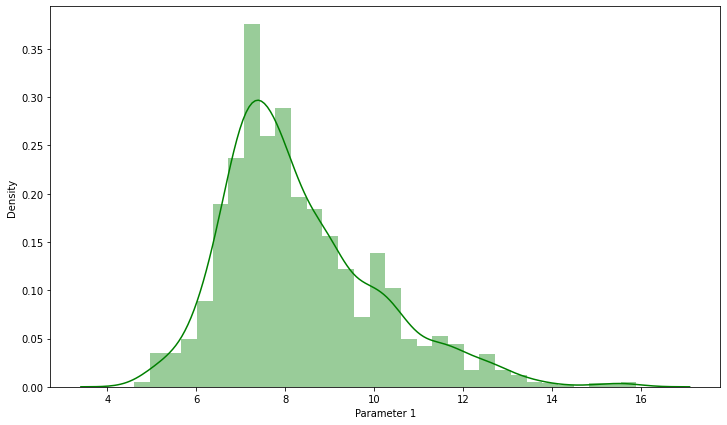

Distributions of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


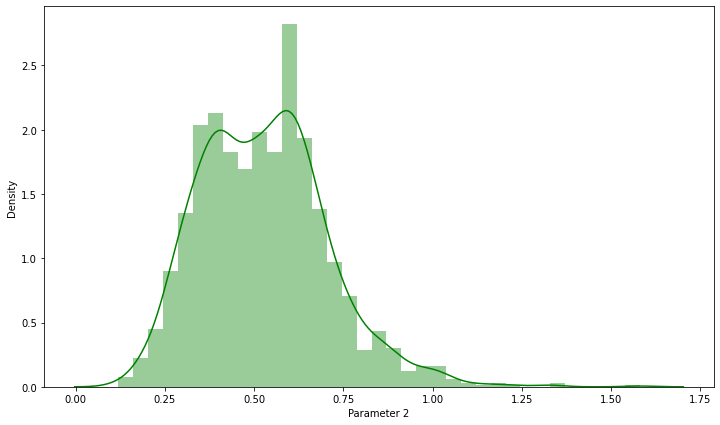

Distributions of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


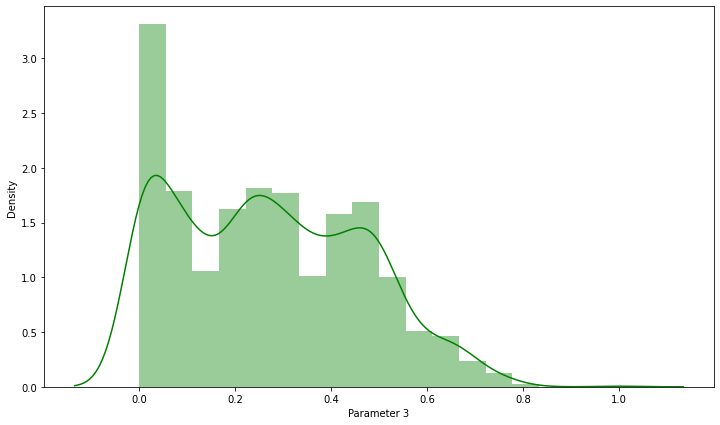

Distributions of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


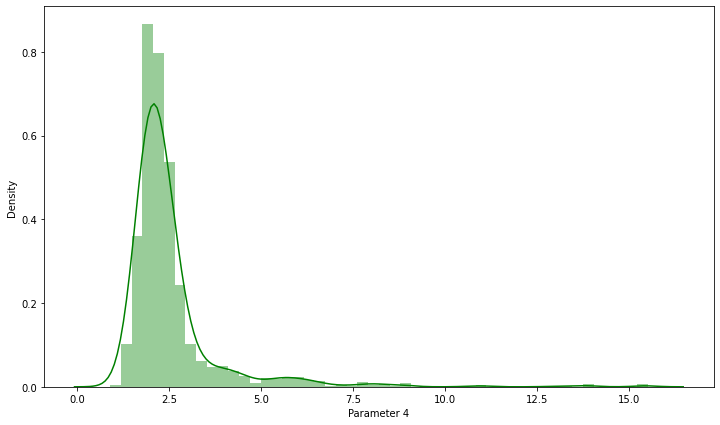

Distributions of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


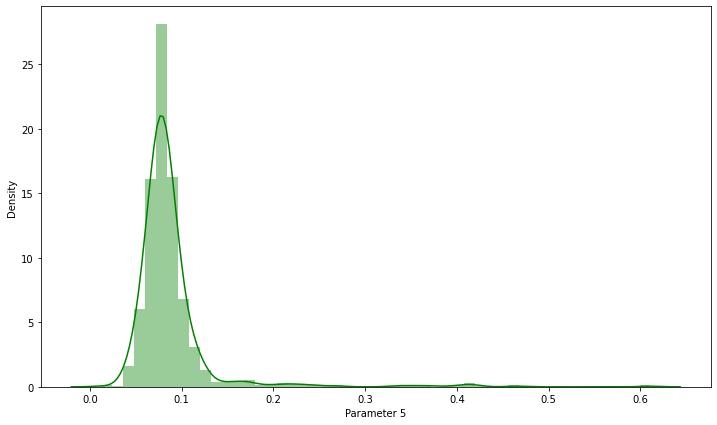

Distributions of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971722
Maximum is: 0.611
Minimum is: 0.012


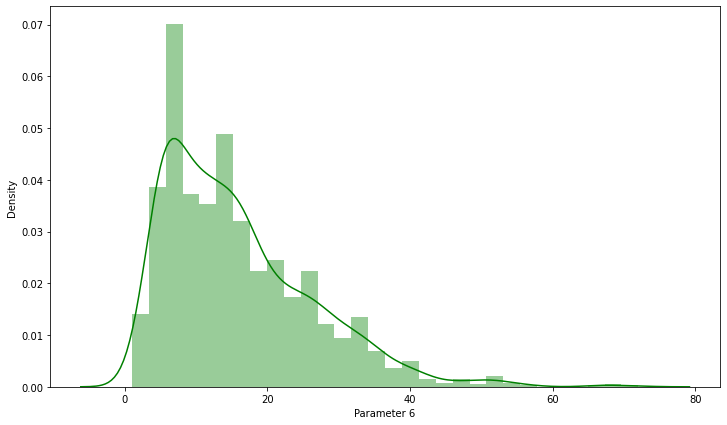

Distributions of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


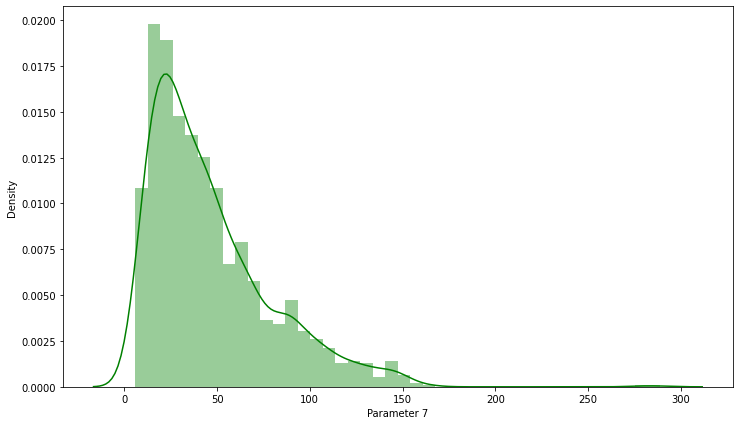

Distributions of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


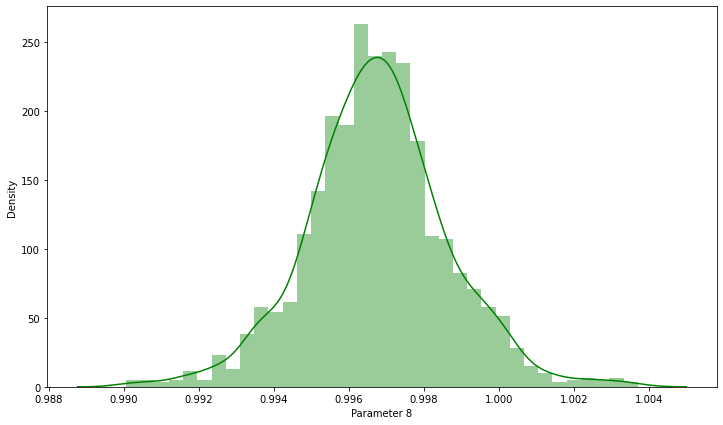

Distributions of  Parameter 8
Mean is: 0.9967466791744833
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425563
Skewness is: 0.07128766294945525
Maximum is: 1.00369
Minimum is: 0.9900700000000001


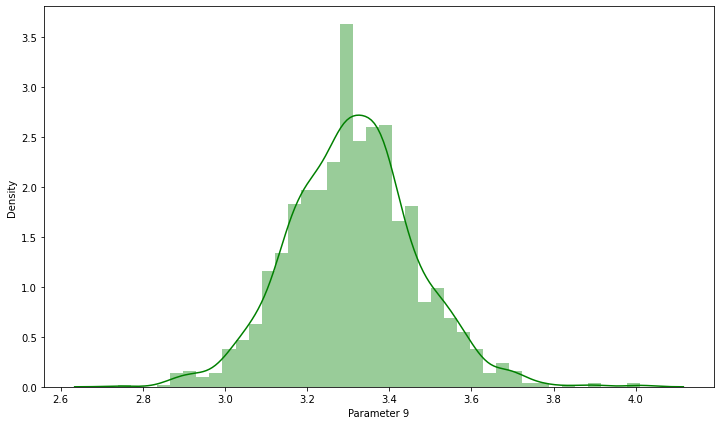

Distributions of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


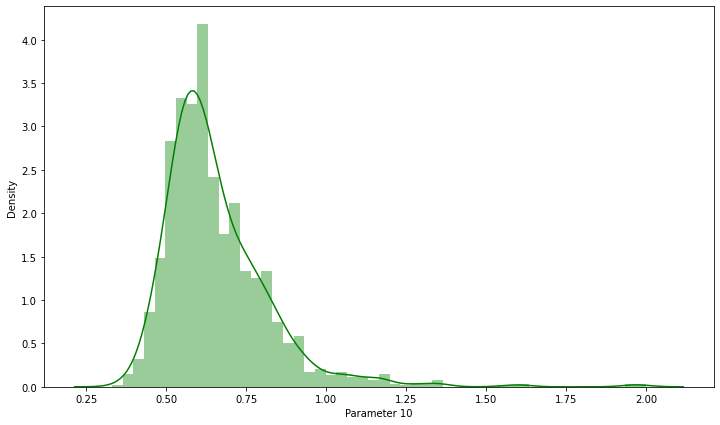

Distributions of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


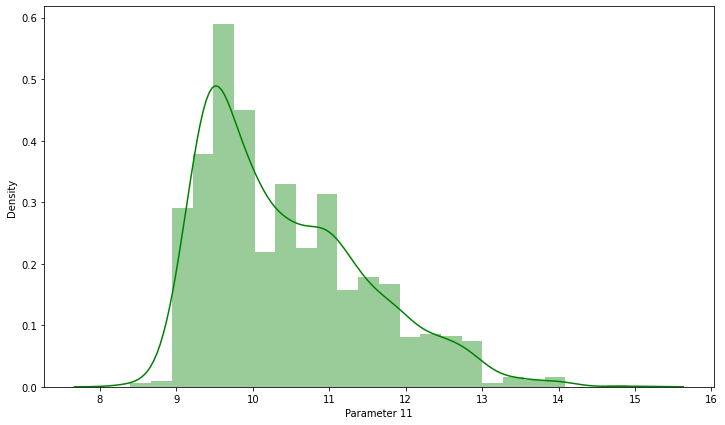

Distributions of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


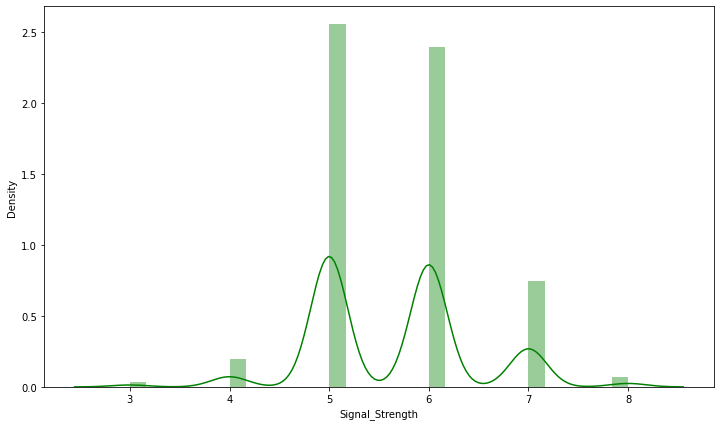

Distributions of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [120]:
# Univariate Analysis
cols = list(ds)
for i in np.arange(len(cols)):
  sns.distplot(ds[cols[i]], color='green')
  plt.show()
  print('Distributions of ', cols[i])
  print('Mean is:', ds[cols[i]].mean())
  print('Median is:', ds[cols[i]].median())
  print('Mode is:', ds[cols[i]].mode())
  print('Standard deviation is:', ds[cols[i]].std())
  print('Skewness is:',ds[cols[i]].skew())
  print('Maximum is:',ds[cols[i]].max())
  print('Minimum is:',ds[cols[i]].min())

Some features are normally distributed and some are right skewed.

Text(0.5, 1.0, 'Scatter plot between Parameter 1 and Parameter 3')

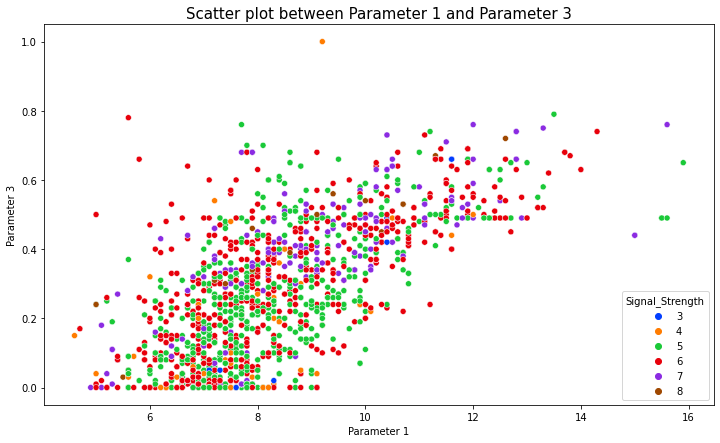

In [121]:
# Bivariate Analysis
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
sns.scatterplot(ds['Parameter 1'], ds['Parameter 3'], data=ds, hue ='Signal_Strength', palette = 'bright', );
plt.title('Scatter plot between Parameter 1 and Parameter 3', fontsize=15)

There is a linear relation between Parameter 1 and Parameter 2

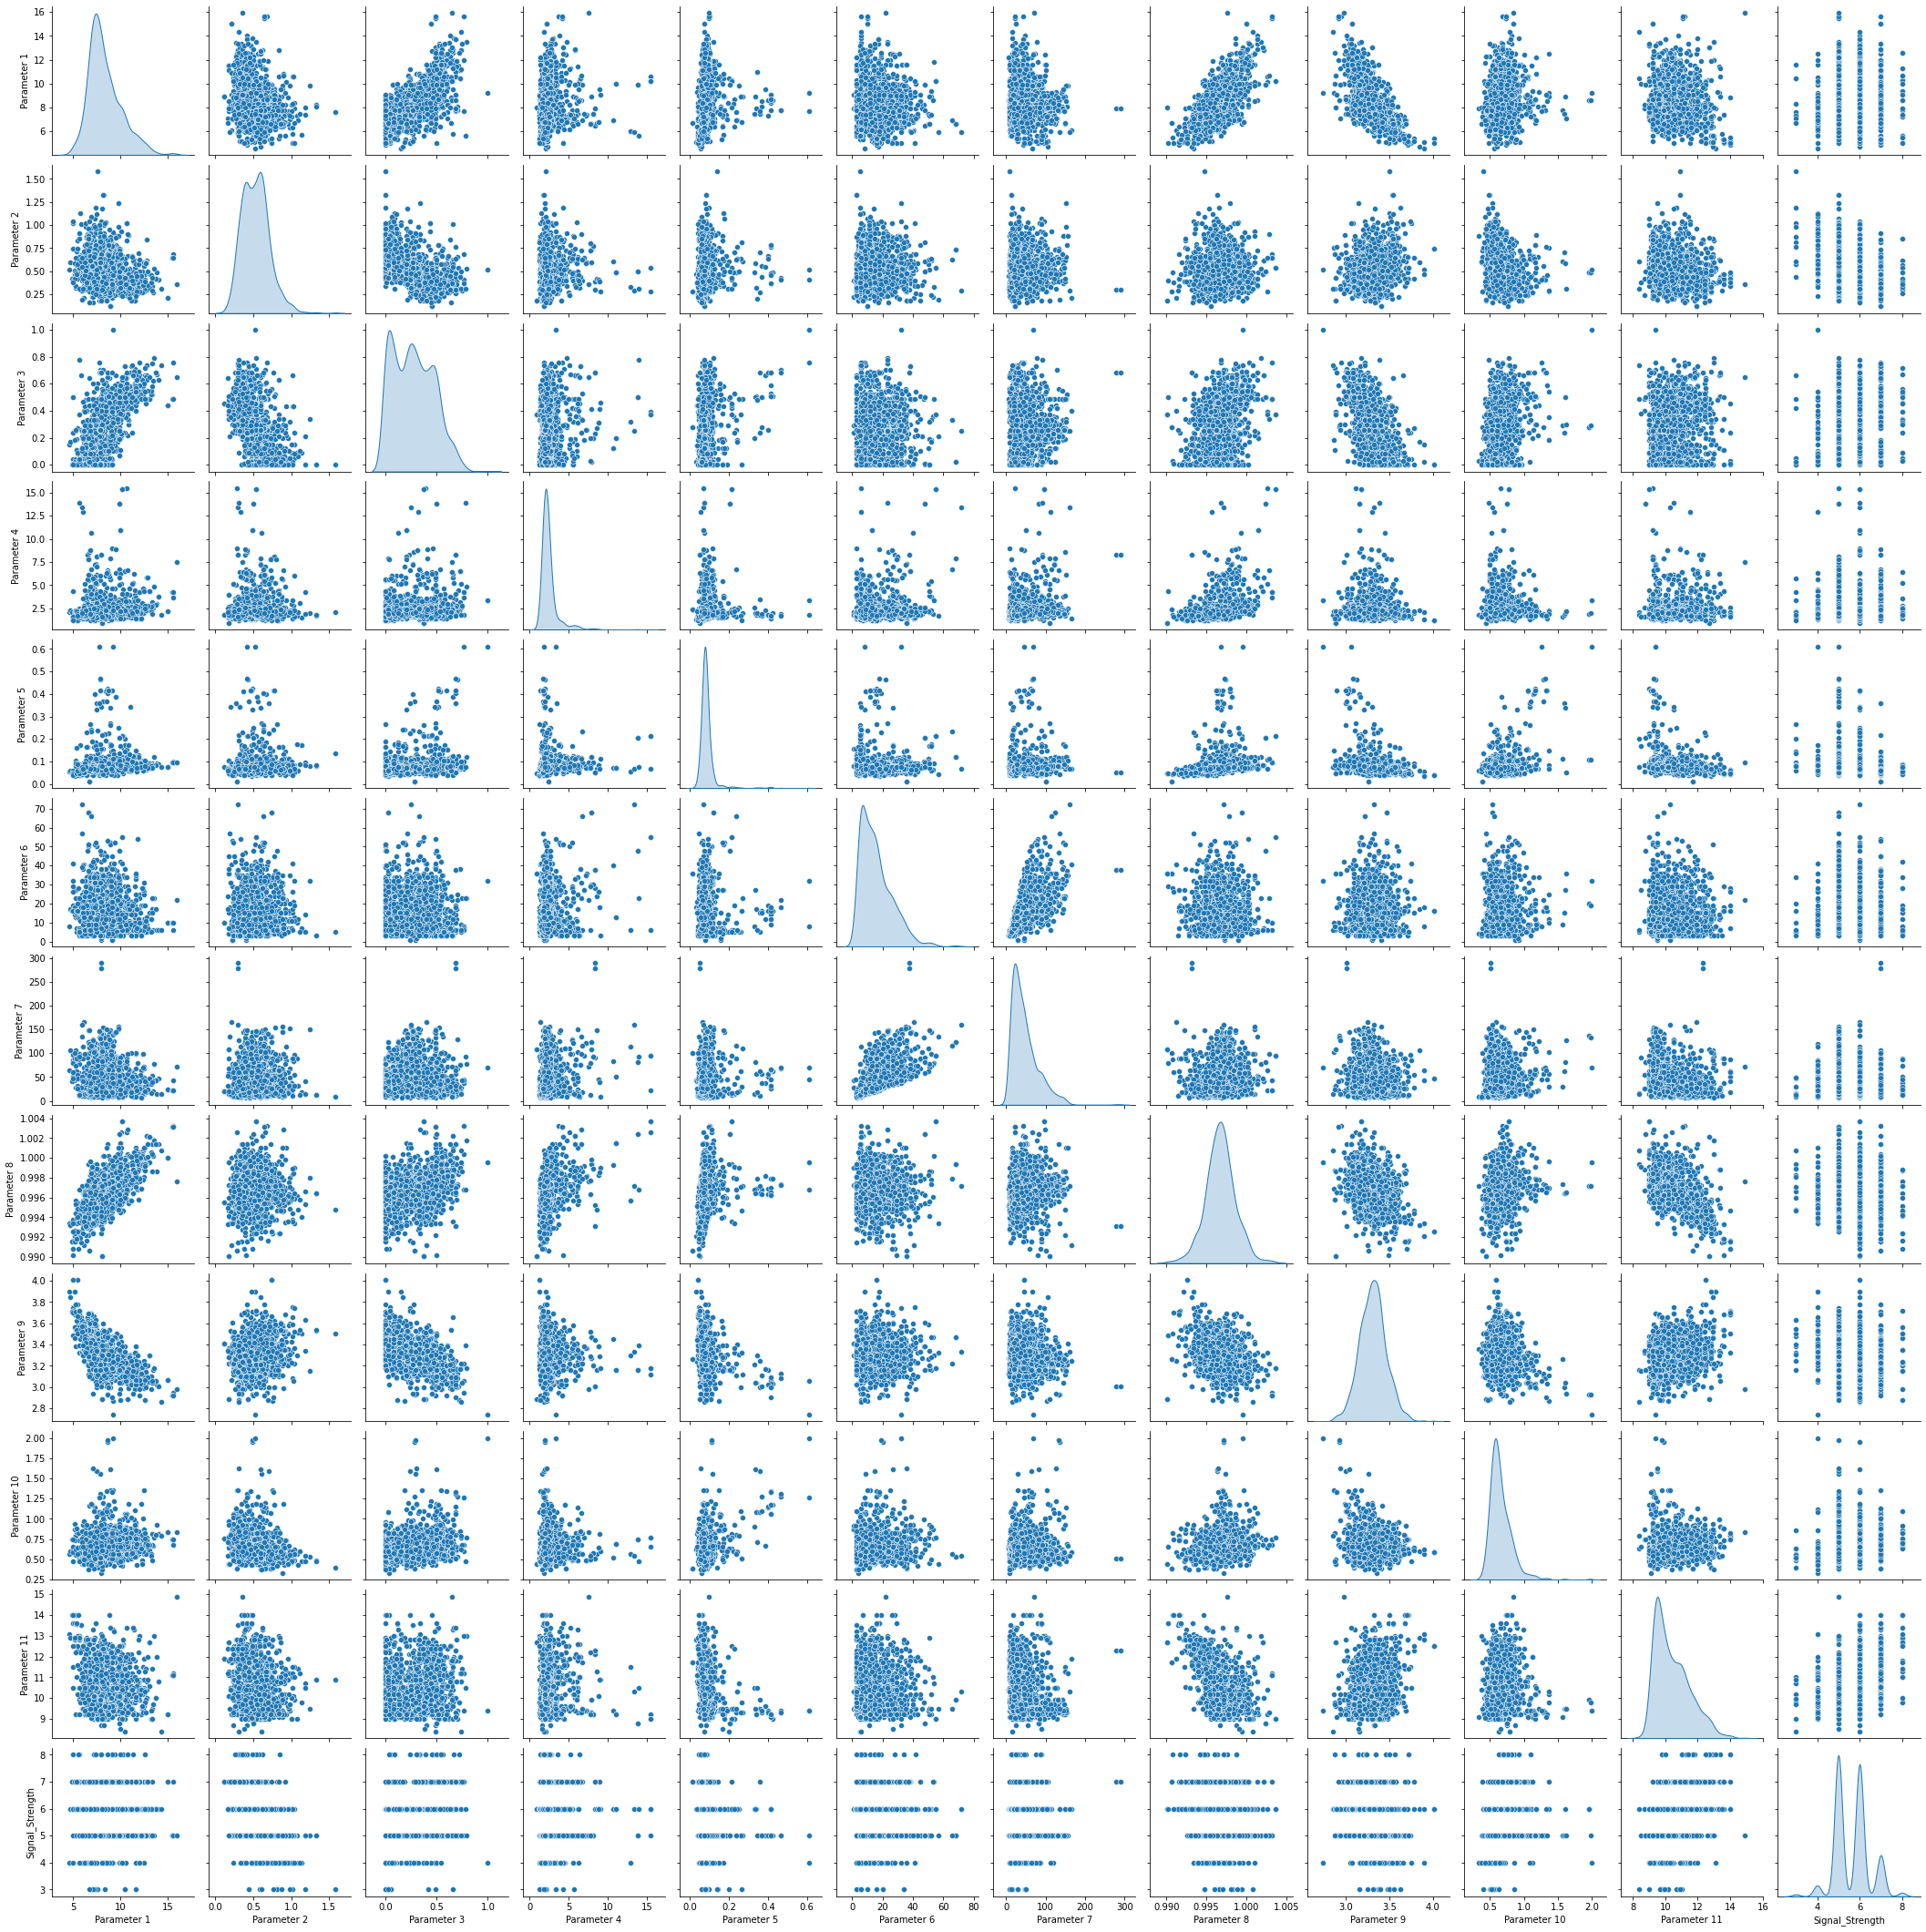

In [122]:
# Multivariate Analysis
sns.pairplot(ds, diag_kind='kde');

Some features are corelated with each other and some are distributed like cloud.

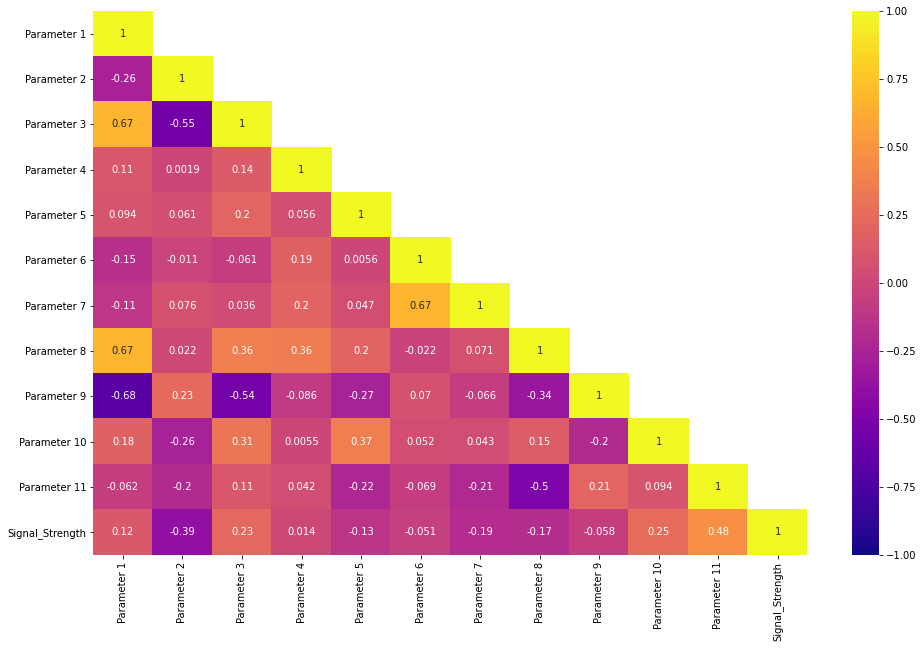

In [123]:
# Coleration Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(ds.corr(), annot=True, vmax=1, vmin=-1,cmap='plasma',mask=np.triu(ds.corr(),+1));

Features are +vely and -vely corelated with eachother

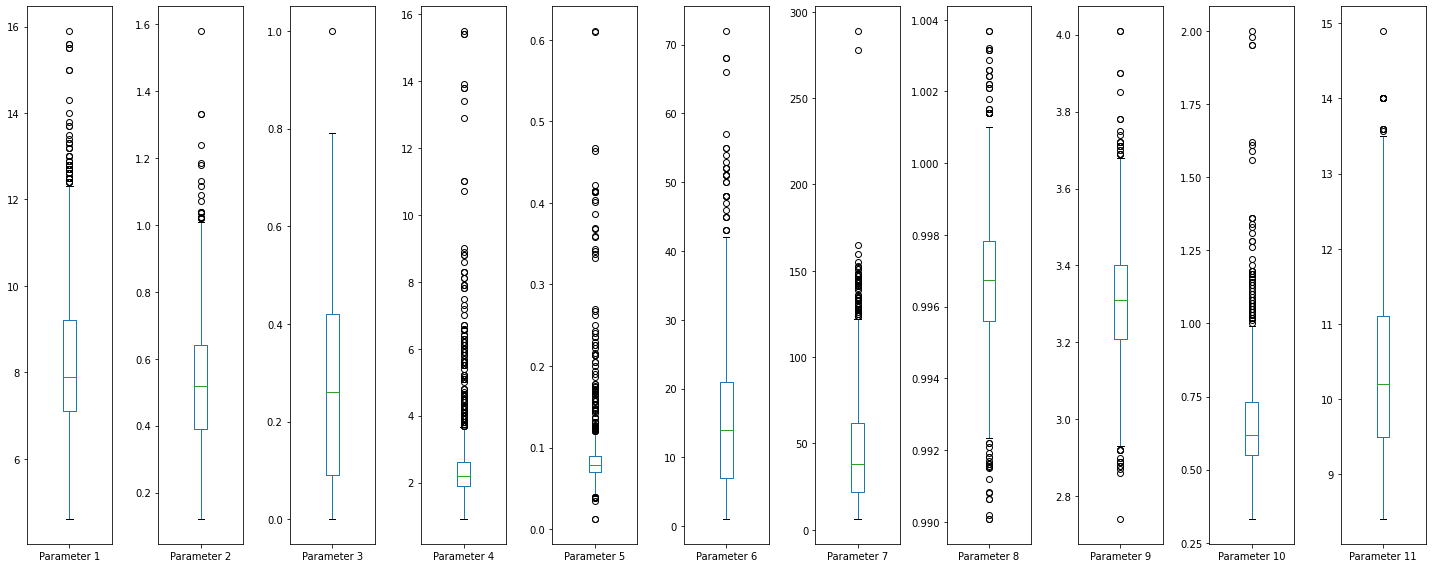

In [124]:
# Outliers Check
ds.iloc[:,:11].plot(kind='box', subplots=True, figsize=(20,8));
plt.tight_layout()

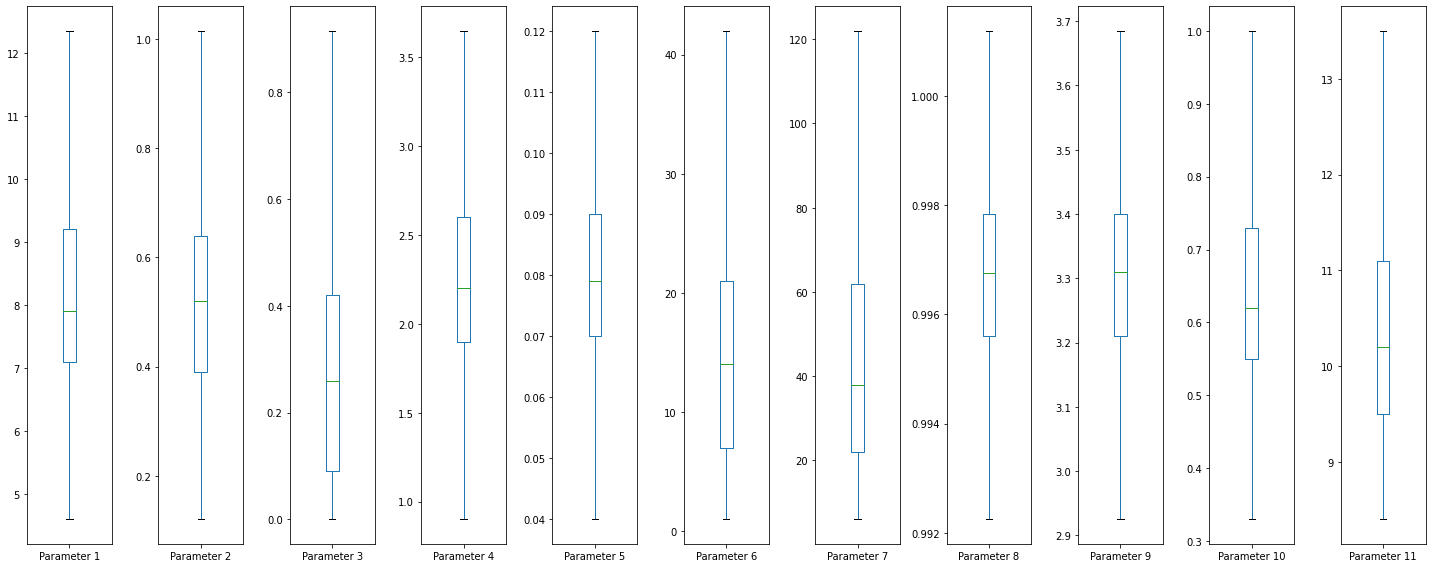

In [125]:
# Treating the outliers using IQR methods
cols = (list(ds.iloc[:,:11]))

def out_limit(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range

for col in cols:
  lr, ur = out_limit(ds[col])
  ds[col] = np.where(ds[col] < lr, lr, ds[col])
  ds[col] = np.where(ds[col] > ur, ur, ds[col])


# Rechecking Outliers
ds.iloc[:,:11].plot(kind='box', subplots=True, figsize=(20,8));
plt.tight_layout()

Now the dataset has no outliers

## 3. Design, train, tune and test a neural network classifier.. 

In [126]:
# Seperating the indipendent and target variable
X = ds.drop('Signal_Strength', axis=1)
y = ds.pop('Signal_Strength')
print(X.shape)
X.head()

(1599, 11)


Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
0          7.4         0.70  ...          0.56           9.4
1          7.8         0.88  ...          0.68           9.8
2          7.8         0.76  ...          0.65           9.8
3         11.2         0.28  ...          0.58           9.8
4          7.4         0.70  ...          0.56           9.4

[5 rows x 11 columns]

In [127]:
y.nunique()

6

There are total 6 classes in the target variable

In [128]:
from keras.utils.np_utils import to_categorical
y= to_categorical(y)
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [129]:
# splitting data for test for classification 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [130]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (1119, 9)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [131]:
# splitting data for  train and validation of classification 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20, random_state=1)

In [132]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (895, 9)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [133]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [139]:
# Building the ANN
model_class = Sequential()
model_class.add(Dense(units=255, activation='relu', input_shape=(11,)))
model_class.add(BatchNormalization())
model_class.add(Dense(units=100, activation='relu'))
model_class.add(Dense(units=50, activation='relu'))
model_class.add(Dense(units=9, activation='softmax'))
adam = optimizers.Adam(learning_rate=0.001)
# Compiling the model
model_class.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer= adam)

In [140]:
# Model summary
model_class.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 255)               3060      
_________________________________________________________________
batch_normalization_4 (Batch (None, 255)               1020      
_________________________________________________________________
dense_27 (Dense)             (None, 100)               25600     
_________________________________________________________________
dense_28 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_29 (Dense)             (None, 9)                 459       
Total params: 35,189
Trainable params: 34,679
Non-trainable params: 510
_________________________________________________________________


In [141]:
# Fit the model
history = model_class.fit(X_train, y_train, batch_size=15, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 1.4819 - accuracy: 0.4365 - val_loss: 1.3549 - val_accuracy: 0.4598
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 1.1375 - accuracy: 0.5243 - val_loss: 1.4268 - val_accuracy: 0.3571
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 1.0793 - accuracy: 0.5670 - val_loss: 1.4221 - val_accuracy: 0.3393
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.9689 - accuracy: 0.6055 - val_loss: 1.3151 - val_accuracy: 0.5000
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.9960 - accuracy: 0.5662 - val_loss: 1.0448 - val_accuracy: 0.5312
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 1.0283 - accuracy: 0.5636 - val_loss: 1.0553 - val_accuracy: 0.5223
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.9467 - accuracy: 0.5798 - val_loss: 1.0291 - val_accuracy: 0.5536
Epoch 8/100
6

In [142]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [143]:
# load the model
model_class = load_model('model_class.h5')

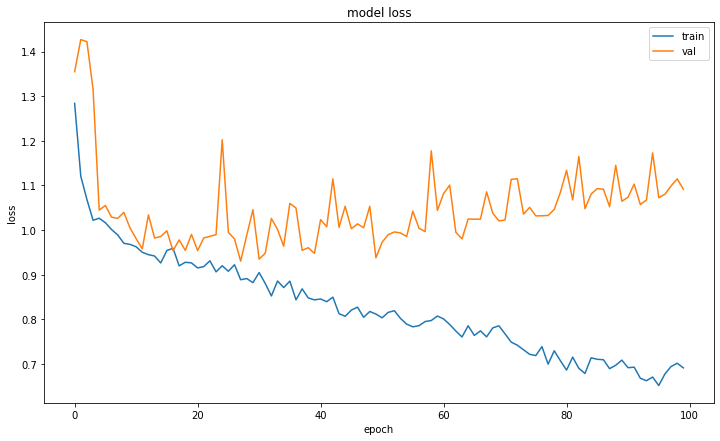

In [144]:
# Summary history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Initially the training and validation loss was high and started decreasing as traing continue but the training loss is contineously dereasing but the validation loss is flat due to very less no of data.

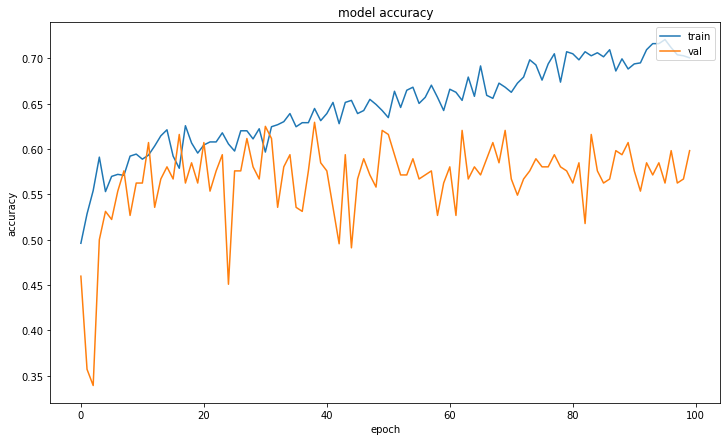

In [145]:
# Summary history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

The training accuracy is increasing contineously but the validation score is flat throught the 100 epochs.

In [148]:
score_train = model_class.evaluate(X_train, y_train, verbose=0)
print(model_class.metrics_names)
print(score_train)

['loss', 'accuracy']
[0.5682741403579712, 0.7631285190582275]


The accuracy on the training data is 76% and loss is 0.568.

In [149]:
score_test = model_class.evaluate(X_test, y_test, verbose=0)
print(model_class.metrics_names)
print(score_test)

['loss', 'accuracy']
[1.1822593212127686, 0.5854166746139526]


The accuracy on the testing data is 59% and loss is 1.182.

In [150]:
Y_pred_cls = model_class.predict_classes(X_test)
print(y_train[0],y_train[1],y_train[2],y_train[3])
print(Y_pred_cls[0],Y_pred_cls[1],Y_pred_cls[2],Y_pred_cls[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0.]
5 5 5 6


**Final Summary:** 

We can see that regression model gives an R2 of 0.35 where as the classification model give an accuracy of 59% on the test data, The classificatiom model uses more parameter when compared to regression

# PART FOUR

## • DOMAIN: Autonomous Vehicles

• BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an 
important component of modern-day map making. A classic example of a corpus of such street-level 
photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree 
panoramic images. 

• PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset

## 1. Import the data

In [68]:
#Open the file as readonly
import h5py
df = h5py.File('/content/drive/MyDrive/AIML PROJECT/DEEP LEARNING/CNN/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [69]:
df.values()

ValuesViewHDF5(<HDF5 file "Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>)

## 2. Data pre-processing and visualisation.

In [70]:
# Checking the shape
print(df['X_train'])
print(df['y_train'])
print(df['X_test'])
print(df['y_test'])
print(df['X_val'])
print(df['y_val'])

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
<HDF5 dataset "y_train": shape (42000,), type "|u1">
<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
<HDF5 dataset "y_test": shape (18000,), type "|u1">
<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
<HDF5 dataset "y_val": shape (60000,), type "|u1">


Training data has 42000 images with the size of 32x32

Validation data has 60000 images with the size of 32x32

Testing data has 18000 images with the size of 32x32


In [71]:
# Converting the data into proper formate
X_train = df['X_train']
X_test = df['X_test']
X_val = df['X_val']
y_train = df['y_train']
y_test = df['y_test']
y_val = df['y_val']

The data is converted into proper formate

Label: 6


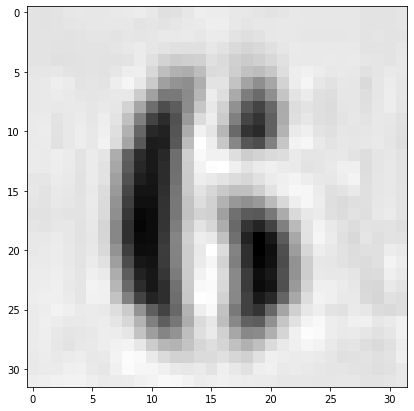

In [72]:
# Vizualizing some images on training data using matplotlib
import matplotlib.pyplot as plt
print('Label:', y_train[1000])
plt.imshow(X_train[1000], cmap='gray');



Label: 1


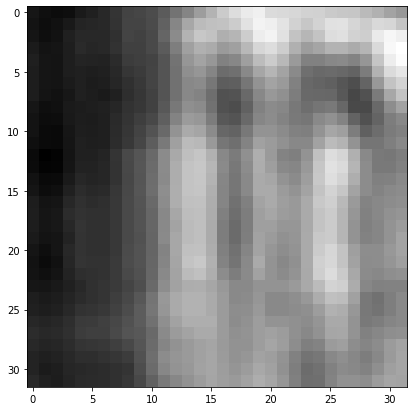

In [73]:
# Visualizing images on test data
print('Label:', y_test[1000])
plt.imshow(X_test[1000], cmap='gray');

Here the image is not clear. lets see how my model is going to predict.

7 2 9 0 9 1 8 4 4 8 
9 1 4 3 5 8 6 5 5 0 
6 5 8 3 2 0 1 9 5 2 
8 9 1 0 9 5 3 3 7 6 
4 2 4 9 6 7 8 8 3 5 
3 7 1 4 8 1 4 2 9 0 
1 5 9 9 2 2 2 4 8 9 
8 3 8 4 5 2 8 6 4 5 
4 2 8 2 4 0 9 9 6 3 
2 7 5 0 7 6 9 8 7 2 


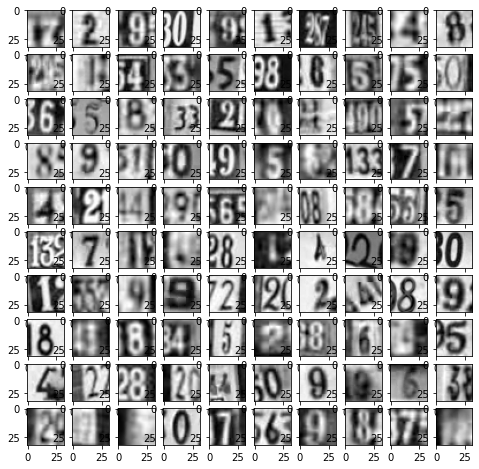

In [74]:
# # visualizing the 25 images in the test dataset
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

## Reshaping the features

#### - reshape() method gives a new shape to an array without changing its data

In [75]:
X_train = np.asarray(X_train).reshape(42000, 1024) # From 2D to 1D 32x32 = 1024
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert X_train and X_val
- number of classes: 10

In [76]:
print(y_train[0])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[0])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [77]:
# Checking the final shape
print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 1024)
The shape of the training (y) dataset: (42000, 10)
The shape of the validation dataset: (60000, 1024)
The shape of the validation (y) dataset: (60000, 10)
The shape of the test dataset: (18000, 1024)
The shape of the test (y) dataset: (18000, 10)


Now the the data is normalized and tragets in the the binary class matrix

## Q3. Design, train, tune and test a neural network image classifier. 
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model

In [78]:
from keras.callbacks import EarlyStopping
# Creating the model
def train_test_loop(iterations, lr, Lambda, verb=True):
  # Hyperparameters 
  iterations = iterations
  learning_rate = lr 
  hidden_nodes = 256
  output_nodes = 10

  model = Sequential()
  model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(1024,)))
  model.add(Dense(hidden_nodes, activation='relu', input_shape= (1024,)))
  model.add(Dense(hidden_nodes, activation='relu'))
  model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
  sgd = optimizers.SGD(learning_rate=lr, momentum=0.9, decay = 1e-6)
  # Model compile
  model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
  # Use earlystopping
  callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
  # Fitting the model
  model.fit(X_train, y_train, epochs = iterations, batch_size = 200, 
            validation_data=(X_val, y_val), verbose=1, callbacks=[callback])
  score = model.evaluate(X_val, y_val, verbose=0)
  print(score)
  return score

In [79]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -0.1))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
210/210 [==============================] - 9s 7ms/step - loss: 2.3551 - accuracy: 0.1408 - val_loss: 2.0662 - val_accuracy: 0.3328
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 2.0063 - accuracy: 0.3645 - val_loss: 1.7544 - val_accuracy: 0.4873
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 1.6937 - accuracy: 0.5043 - val_loss: 1.4932 - val_accuracy: 0.5786
Epoch 4/100
210/210 [==============================] - 1s 5ms/step - loss: 1.4515 - accuracy: 0.5924 - val_loss: 1.3082 - val_accuracy: 0.6371
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 1.2829 - accuracy: 0.6458 - val_loss: 1.1858 - val_accuracy: 0.6726
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 1.1685 - accuracy: 0.6725 - val_loss: 1.1019 - val_accuracy: 0.6946
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 1.0976 - accuracy: 0.6946 - val_loss: 1.0379 - val_accuracy: 0.7103

After fine search picking learning rate and lambda as Lambda = 1e-4, lr = 2e-2 for final run.

In [80]:
# After fine search doing final iteration on picked learning rate and lambda

# Hyperparameters 
Lambda = 1e-4
lr = 2e-2 
hidden_nodes = 256
output_nodes = 10

#Initialize the Artificial Neural Network Classifier
model = Sequential()
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(1024,)))
model.add(Dense(hidden_nodes, activation='relu', input_shape= (1024,)))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
sgd = optimizers.SGD(learning_rate=lr, momentum=0.9, decay = 1e-6)

# Model compile
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# Fitting the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 200, 
                    validation_data=(X_val, y_val), verbose=1, callbacks=[callback])

Epoch 1/100
210/210 [==============================] - 2s 7ms/step - loss: 1.7410 - accuracy: 0.4126 - val_loss: 0.8469 - val_accuracy: 0.7447
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 0.8647 - accuracy: 0.7336 - val_loss: 0.7386 - val_accuracy: 0.7757
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 0.7226 - accuracy: 0.7747 - val_loss: 0.6364 - val_accuracy: 0.8087
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6128 - accuracy: 0.8128 - val_loss: 0.5668 - val_accuracy: 0.8309
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 0.5605 - accuracy: 0.8299 - val_loss: 0.5294 - val_accuracy: 0.8433
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 0.5126 - accuracy: 0.8459 - val_loss: 0.5097 - val_accuracy: 0.8497
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.4814 - accuracy: 0.8543 - val_loss: 0.4780 - val_accuracy: 0.8609

**Now, after final iteration the model has performed well on training and validation data with the accuracy of 88% and 87% respectivily**

**Loss on training was 0.03704 and on validation 0.4430**

### Q4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [81]:
# Evaluating validation data
validation_score = model.evaluate(X_val, y_val)
print('Validation accuracy using SGD:', validation_score[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4430 - accuracy: 0.8738
Validation accuracy using SGD: 0.8738333582878113


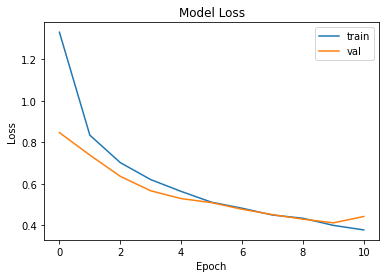

In [82]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Concl:

1. After fine tuning of hyperparamter (lanbda, learning_rate) my trainign loss is contineously decreasing using 100 epochs but the model has stoped early using callbacks function at 11 epochs only.

2. The validation loss is reasonable with 0.4430 and accuracy 87%.

3. We can further reduce the loss after more tuning.

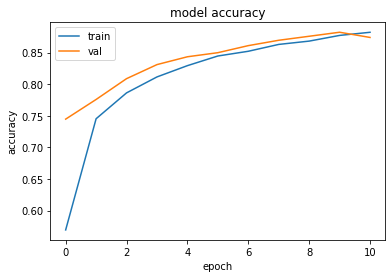

In [83]:
# Ploting the training loss, validation loss vs number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Concl:

1. The graph shows both the training and testing doing extreamly well.

2. Validation data has also giving a very good accuracy of 87%.

3. Now will check performance on test data for final evaluation.

In [84]:
# Fitting the model on test data to find the accuracy
test_score = model.evaluate(X_test, y_test)
print('Test accuracy using SGD:', test_score[1])

563/563 [==============================] - 2s 2ms/step - loss: 0.6430 - accuracy: 0.8297
Test accuracy using SGD: 0.8296666741371155


The accuracy and loss on test data is 0.643 and 83% respectivily.

## **Predicting the digits using Neural Network classifier on test data**

Label: 2


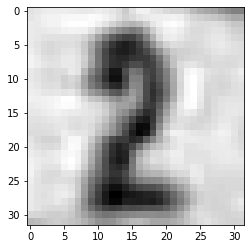

In [85]:
# Image from test data
plt.imshow(X_test[2].reshape(32,32), cmap='gray');

# Predicting the digits on test data
print('Label:', model.predict_classes(X_test)[2])

We can see that the model is working well on the test data. Image of 2 is predicted as 2.bit_length

Lets check another image.

Label: 9


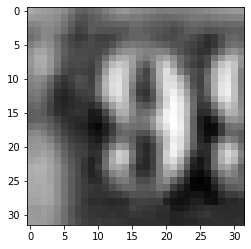

In [86]:
# Image from test data
plt.imshow(X_test[5].reshape(32,32), cmap='gray');

# Predicting the digits on test data
print('Label:', model.predict_classes(X_test)[5])

Predicting image of 9 as 9.

Label: 0


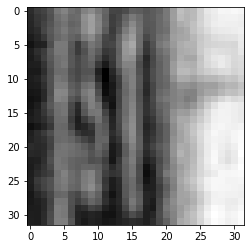

In [87]:
# Image from test data
plt.imshow(X_test[0].reshape(32,32), cmap='gray');

# Predicting the digits on test data
print('Label:', model.predict_classes(X_test)[0])

With more no. of digits the model is not able to predict. The model is predicting this image as 0(zero)

In [88]:
# Predicting on the rest data
ytest_predict = model.predict_classes(X_test)
print(ytest_predict)

[0 7 2 ... 7 9 2]


Actual labels corresponding to below images: [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3 5 8 6 5 5 0 6 5 8 3]


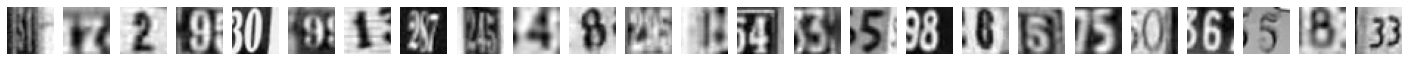

Predicted labels corresponding to above images: [0 7 2 9 0 9 1 8 1 4 8 2 1 4 3 5 8 6 5 5 0 6 5 8 3]


In [89]:
#visualising the first 25 images of the test data and printing their labels
print('Actual labels corresponding to below images: %s' % (df['y_test'][0:25]))
plt.figure(figsize=(25,1))
for i in range(25):
  plt.subplot(1, 25, i+1)
  plt.imshow(X_test[i].reshape(32,32), cmap='gray')
  plt.axis('off')
plt.show()
print('Predicted labels corresponding to above images: %s' % (ytest_predict[0:25]))


As we can see above the model appers to predict images with single digits/double digits very well

But not able to predict on three digit images.